In [30]:
# Libraries
import math
import cmath
import matplotlib.pyplot as plt

## 1.2 Computer precision

#### Task 1
As explained in the lectures, mathematical operations does not satisfy exactly some of their
natural properties as commutativity, distributivity and associativity. A usual situation when
we could reach a threshold of precision is once we’d like to sum or multiply large and small
numbers together. Another critical error is once we are of the range that can be sufficiently
represented by a computer. What are possible cases?

Answer - example cases:

1. Loss of significance - subtracting two nearly equal numbers:

In [31]:
a = 1.0000000000001
print(a)

1.0000000000001


In [32]:
a = a - 1.0
print(a)
print(a == 0.0)

9.992007221626409e-14
False


we can see that answer isn't equal to exactly 0.0000000000001, but instead to 00000000000009992007...

The error is around 0.1%, which is pretty significnt. If storing the value 0.0000000000001 directly, it is stored correctly:

In [33]:
a = 0.0000000000001
print(a)

1e-13


2.  Floating-point rounding errors:

In [34]:
a = 0.1 + 0.2
print(a)
print(a == 0.3)

0.30000000000000004
False


3. Associativity, distributivity issues:

In [35]:
# False, but true in real math
print(0.1 + (0.2 + 0.3) == (0.1 + 0.2) + 0.3)
print(0.1*(0.1 + 0.3) == 0.1*0.1 + 0.1*0.3)

False
False


#### Task 2
Let us illustrate it on several examples directly in console. Compare the results of $|z|$ and $\sqrt{z \bar{z}}$ for $z \in \{100e^{i\pi/4}, 10^{200}e^{i\pi/4}\}$. Comment the result.

This example shows that even though the result is within well-represented number, we get it wrong if there is a problem in the computation producing it. Actually, the factor $e^{i\pi/4}$ is not important in this task.

We use the complex numbers just to illustrate, that a naïve implementation of $|z|$ may be limiting.



In [36]:
# Define complex numbers
z1 = 100 * cmath.exp(1j * cmath.pi / 4)
z2 = 10**200 * cmath.exp(1j * cmath.pi / 4)

# Function to compare abs(z) and sqrt(z * z_conjugate)
def compare_magnitudes(z):
    abs_z = abs(z)
    sqrt_zz_conj = cmath.sqrt(z * z.conjugate())
    print(f"z = {z}")
    print(f"|z| = {abs_z}")
    print(f"√(z * z*) = {sqrt_zz_conj}")
    print(f"Difference = {abs_z - sqrt_zz_conj.real}\n")

compare_magnitudes(z1)
compare_magnitudes(z2)


z = (70.71067811865476+70.71067811865474j)
|z| = 100.0
√(z * z*) = (99.99999999999999+0j)
Difference = 1.4210854715202004e-14

z = (7.071067811865475e+199+7.071067811865474e+199j)
|z| = 1e+200
√(z * z*) = (inf+nanj)
Difference = -inf



We can see that the abs() implementation provided from the standard library of Python is giving correct values, while the naive implementation has some issues.

We can also see that difference for naive method for moderate values is extremely small (1.4e-14), but for large numbers its just non-computable, resulting in infinity.

#### Task 3
The fail of associativity may be seen in sums. Compute

$$
S_N = \sum_{i=0}^{N} q^i
$$

in the ascending and descending orders for  
1) $q = 0.9$ and $N = 400$  
2) $q = 1 - 10^{-6}$ and $N = 10^4$.  

Compare the results and errors with the exact result

$$
S_N = \frac{1 - q^{N+1}}{1 - q}.
$$


In [37]:
def compute_sum(q, N):
    # Ascending order
    asc_sum = sum(q**i for i in range(N + 1))

    # Descending order
    desc_sum = sum(q**i for i in reversed(range(N + 1)))

    # Exact result using geometric series formula
    exact = (1 - q**(N + 1)) / (1 - q)

    # Report
    print(f"q = {q}, N = {N}")
    print(f"Ascending sum:  {asc_sum}")
    print(f"Descending sum: {desc_sum}")
    print(f"Exact result:   {exact}")
    print(f"Error (asc):    {abs(asc_sum - exact)}")
    print(f"Error (desc):   {abs(desc_sum - exact)}\n")

# Case 1: q = 0.9, N = 400
compute_sum(q=0.9, N=400)

# Case 2: q = 1 - 1e-6, N = 10_000
compute_sum(q=1 - 1e-6, N=10_000)


q = 0.9, N = 400
Ascending sum:  10.000000000000002
Descending sum: 10.000000000000002
Exact result:   10.000000000000002
Error (asc):    0.0
Error (desc):   0.0

q = 0.999999, N = 10000
Ascending sum:  9951.161250911773
Descending sum: 9951.161250911773
Exact result:   9951.16125091173
Error (asc):    4.3655745685100555e-11
Error (desc):   4.3655745685100555e-11



Although there is some error, the sums were computed correctly. 
The example above works in Matlab, as it is using different number representation, but Python managed to do the task correctly, with ascending and descending sums being equal.

But python still has problems with associativity that can be observed on different examples, like here:

In [38]:
print(0.1 + (0.2 + 0.3) == (0.1 + 0.2) + 0.3)


False


#### Additional task
Even we’ve seen a difference in the previous point, the relative error’s been still small. Let us
investigate an example, where errors grow fast, proposed by prof. Edita Pelantov´a: https://people.fjfi.cvut.cz/pelanedi/SSM/prednaska.pdf; implement the algorithm from the
slide 7 and compare it with the direct implementation

![image.png](image.png)

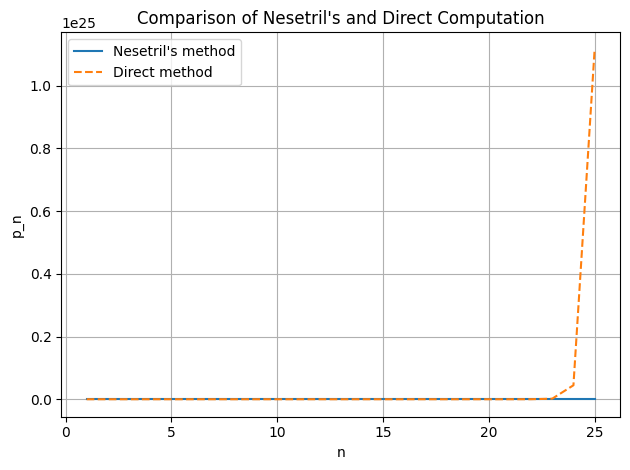

In [39]:
# Number of terms to calculate
n = 25

# Direct implementation of e
e_approx = sum(1 / math.factorial(k) for k in range(n + 1))
e_minus_1 = e_approx - 1

# Nesetril's iterative calculation
p = [0] * (n + 1)
p[1] = e_minus_1

for i in range(2, n + 1):
    p[i] = i * (p[i - 1] - 1)

# Compare with direct method
direct_method = [sum(1 / math.factorial(k) for k in range(1, i + 2)) * math.factorial(i) - math.factorial(i) for i in range(1, n + 1)]

# Plot the values
indices = list(range(1, n + 1))
plt.plot(indices, p[1:], label="Nesetril's method")
plt.plot(indices, direct_method, '--', label="Direct method")
plt.xlabel('n')
plt.ylabel('p_n')
plt.title("Comparison of Nesetril's and Direct Computation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The error grows exponentially in direct method due to computing large factorials and small fractions.